In [3]:
# 1. Importar la librería Pandas
import pandas as pd

# 2. Leer nuestro NUEVO archivo CSV y guardarlo en 'df'
# Esta vez no ponemos 'sep' porque la mayoría de archivos de Kaggle usan coma (,)
df = pd.read_csv('retail_sales_dataset.csv')

# 3. Mostrar las primeras 5 filas para verificar
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# 1. Ver la estructura y tipos de datos de CADA columna
print("--- Información General (Tipos de Dato) ---")
df.info()

# 2. Contar cuántos valores nulos (vacíos) hay por columna
print("\n--- Conteo de Valores Nulos (Vacíos) ---")
print(df.isnull().sum())

# 3. Contar cuántas filas duplicadas (idénticas) hay en TOTAL
print("\n--- Conteo de Filas Duplicadas ---")
print(df.duplicated().sum())

--- Información General (Tipos de Dato) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

--- Conteo de Valores Nulos (Vacíos) ---
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

--- Conteo de Filas Duplicadas ---
0


In [5]:
# 1. Creamos una copia del DataFrame para no modificar el original.
# Esta es una buena práctica.
df_limpio = df.copy()

# 2. CORREGIR TIPOS DE DATO
# Convertimos la columna 'Date' de texto (object) a fecha (datetime)
# 'format="%Y-%m-%d"' le da una pista a pandas de cómo leer la fecha (Año-Mes-Día)
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'], format="%Y-%m-%d")

# 3. GENERAR NUEVAS VARIABLES

# Extraer 'Mes' y 'Año' de la columna 'Date'
df_limpio['Mes'] = df_limpio['Date'].dt.month
df_limpio['Año'] = df_limpio['Date'].dt.year

# Generar una nueva variable categórica para 'Age'
# -- crear "grupos" de edad.
# Límites de las cajas
bins = [0, 25, 35, 45, 55, 100]
# Etiquetas para las cajas
labels = ['Joven (0-25)', 'Adulto Joven (26-35)', 'Adulto (36-45)', 'Adulto Mayor (46-55)', 'Senior (55+)']
# crear la columna
df_limpio['Grupo_Edad'] = pd.cut(df_limpio['Age'], bins=bins, labels=labels, right=True)

# 4. VERIFICAR EL RESULTADO
print("--- Información del DataFrame LIMPIO (Nuevos Dtypes) ---")
df_limpio.info()

print("\n--- Vista Previa del DataFrame LIMPIO (Nuevas Columnas) ---")
df_limpio.head()

--- Información del DataFrame LIMPIO (Nuevos Dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Mes               1000 non-null   int32         
 10  Año               1000 non-null   int32         
 11  Grupo_Edad        1000 non-null   category      
dtypes: category(1), datetime64[ns](1), int32(2), int64(5), object(3)
memory usag

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mes,Año,Grupo_Edad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023,Adulto Joven (26-35)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023,Adulto Joven (26-35)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023,Adulto Mayor (46-55)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023,Adulto (36-45)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,Adulto Joven (26-35)


In [6]:
# 1. Estadísticas de columnas numéricas (precio, edad, cantidad)
print("--- Estadísticas Descriptivas (Numéricas) ---")
# .describe() da la media, mediana (50%), min, max, etc.
print(df_limpio.describe())

# 2. Conteo de valores en 'Product Category'
print("\n--- Conteo por Categoría de Producto ---")
# .value_counts() dice cuántas filas hay de cada categoría
print(df_limpio['Product Category'].value_counts())

# 3. Conteo de valores en 'Gender'
print("\n--- Conteo por Género ---")
print(df_limpio['Gender'].value_counts())

--- Estadísticas Descriptivas (Numéricas) ---
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount          Mes          Año  
count     1000.000000   1000.000000  1000.000000  1000.000000  
mean       179.890000    456.000000     6.549000  2023.002000  
min         25.000000     25.000


--- Visualización 1: Distribución del Monto Total de Compra ---


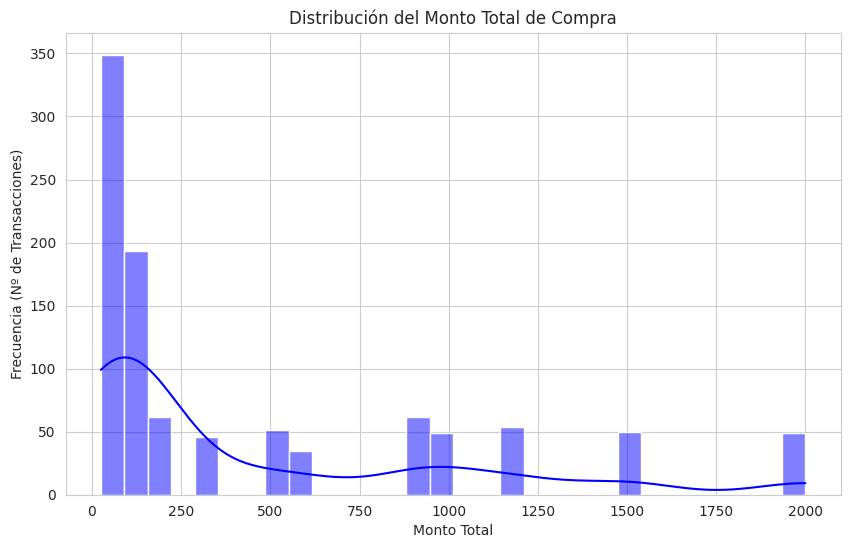


--- Visualización 2: Conteo de Ventas por Categoría ---


/tmp/ipython-input-2053070476.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_limpio, x='Product Category', palette='viridis')


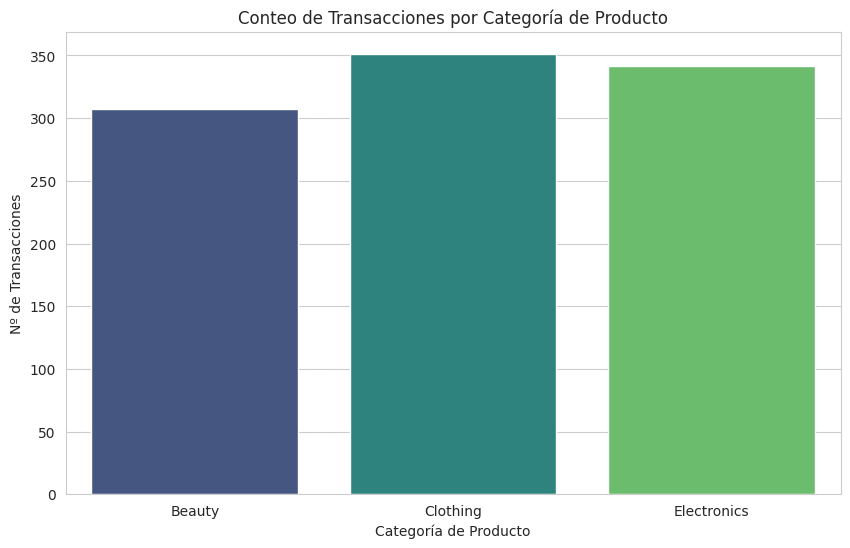


--- Visualización 3: Conteo de Ventas por Género ---


/tmp/ipython-input-2053070476.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_limpio, x='Gender', palette='plasma')


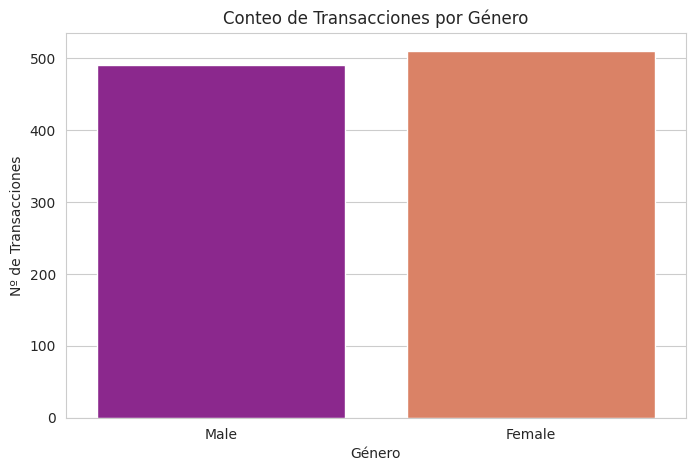

In [7]:
# 1. Importar las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se vean bien
sns.set_style("whitegrid")

# Visualización 1: Histograma del Monto Total
# Un histograma nos muestra la distribución de un número.
print("\n--- Visualización 1: Distribución del Monto Total de Compra ---")
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico
sns.histplot(df_limpio['Total Amount'], bins=30, kde=True, color='blue')
plt.title('Distribución del Monto Total de Compra')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia (Nº de Transacciones)')
plt.show() # Muestra el gráfico

# Visualización 2: Conteo de Ventas por Categoría de Producto
print("\n--- Visualización 2: Conteo de Ventas por Categoría ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_limpio, x='Product Category', palette='viridis')
plt.title('Conteo de Transacciones por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Nº de Transacciones')
plt.show()

# Visualización 3: Conteo de Ventas por Género
print("\n--- Visualización 3: Conteo de Ventas por Género ---")
plt.figure(figsize=(8, 5))
sns.countplot(data=df_limpio, x='Gender', palette='plasma')
plt.title('Conteo de Transacciones por Género')
plt.xlabel('Género')
plt.ylabel('Nº de Transacciones')
plt.show()

In [9]:
# Pregunta 1: ¿Qué categoría de producto genera más INGRESOS TOTALES?

print(" PREGUNTA 1: Ingresos Totales por Categoría de Producto")
# Agrupamos por 'Product Category', seleccionamos 'Total Amount' y sumamos.
ingresos_categoria = df_limpio.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(ingresos_categoria)


# Pregunta 2: ¿Qué grupo de edad gasta más EN PROMEDIO por transacción?

print("\n PREGUNTA 2: Gasto Promedio por Grupo de Edad")
# Agrupamos por 'Grupo_Edad' y calculamos la media (promedio) de 'Total Amount'
gasto_promedio_edad = df_limpio.groupby('Grupo_Edad')['Total Amount'].mean().sort_values(ascending=False)
print(gasto_promedio_edad)


# Pregunta 3: ¿Cómo evolucionan los ingresos totales a lo largo de los meses?

print("\n PREGUNTA 3: Ingresos Totales por Mes")
# Agrupamos por 'Mes' y sumamos el 'Total Amount'
# .sort_index() los ordena por mes en lugar de por total de ventas
ingresos_por_mes = df_limpio.groupby('Mes')['Total Amount'].sum().sort_index()
print(ingresos_por_mes)

 PREGUNTA 1: Ingresos Totales por Categoría de Producto
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

 PREGUNTA 2: Gasto Promedio por Grupo de Edad
Grupo_Edad
Joven (0-25)            500.295858
Adulto Joven (26-35)    480.390244
Adulto (36-45)          454.801980
Adulto Mayor (46-55)    439.694323
Senior (55+)            412.358974
Name: Total Amount, dtype: float64

 PREGUNTA 3: Ingresos Totales por Mes
Mes
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


/tmp/ipython-input-1218756877.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gasto_promedio_edad = df_limpio.groupby('Grupo_Edad')['Total Amount'].mean().sort_values(ascending=False)


## **Pregunta 1:** ¿Qué categoría de producto genera más INGRESOS TOTALES?

**Tabla de Evidencia:**

Electronics    156905

Clothing       155580

Beauty         143515

### **Interpretación**:
Aunque Electronics es la categoría que genera más ingresos, los resultados están muy parejos con Clothing. Beauty se encuentra en un cercano tercer lugar. Esto indica que los ingresos totales de la tienda están bien diversificados entre las tres categorías principales.

##**Pregunta 2:** ¿Qué grupo de edad gasta más EN PROMEDIO por transacción?

**Tabla de Evidencia:**

Joven (0-25)            500.29

Adulto Joven (26-35)    480.39

Adulto (36-45)          454.80

Adulto Mayor (46-55)    439.69

Senior (55+)            412.35

### **Interpretación**:
Se observa una tendencia clara: a menor edad, mayor es el gasto promedio por transacción. El grupo "Joven (0-25)" gasta, en promedio, más de 500 por compra, mientras que el gasto promedio desciende consistentemente a medida que aumenta la edad, siendo el grupo "Senior (55+)" el que tiene el gasto promedio más bajo (412).

## **Pregunta 3:** ¿Cómo evolucionan los ingresos totales a lo largo de los meses?

**Tabla de Evidencia:**

Mes

1     36980

2     44060

3     28990

4     33870

5     53150

...

9     23620

12    44690

### **Interpretación**:
Los ingresos no son estables durante el año; muestran una clara estacionalidad. Se identifican picos de ingresos en Mayo (Mes 5), que fue el mes más fuerte con 53,150, y valles significativos en Septiembre (Mes 9), que fue el mes más débil con 23,620. También se observa un buen desempeño en Febrero (Mes 2) y Diciembre (Mes 12).